In [24]:
import os
from enum import Enum
import pandas as pd
import re
import numpy as np
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from metadata import ACL_metadata
from metadata import Gender
from collections import defaultdict
from itertools import chain
# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *
import plotly 
plotly.tools.set_credentials_file(username='RamonaComanescu', api_key='ZZR0OIrpZCow6nTAUPR0')

In [25]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

## General statistics

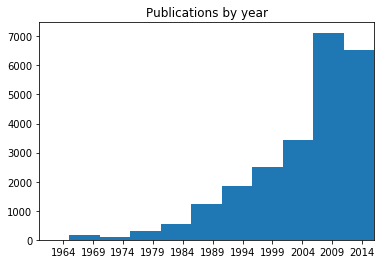

In [26]:
a=list(map(lambda x: int(x), list(df["year"].values)))
plt.hist(a)
plt.xlim([1960,2016])
plt.xticks(np.arange(1964,2015,5))
plt.title("Publications by year")
plt.savefig("plots/PublicationsByYear")
plt.show()

In [27]:
print("{0} papers and {1} unique authors".format(df.shape[0],len(acl.auths)))
print("Average papers per authors {0:.2f}".format(df.shape[0]/len(acl.auths)))

23766 papers and 18379 unique authors
Average papers per authors 1.29


In [28]:
categories =list( map(lambda e: e.value,list(chain.from_iterable(df["genders"].values))))
from collections import Counter

In [29]:
f = [0] * len(known_f)
m = [1] * len(known_m)
u = [2] * len(new_unknown)

## Unique authors who have published at least a paper

In [30]:
print("Total papers: {0}".format(df.shape[0]))
n = len(auths)
print("Females: {0}, Males: {1}, Unknown: {2}".format(len(known_f),len(known_m),len(new_unknown)))
print("Females: {0:.2f} Males: {1:.2f} Unknown: {2:.2f}".format(len(known_f)/n, len(known_m)/n,len(new_unknown)/n))

Total papers: 23766
Females: 4945, Males: 12425, Unknown: 779
Females: 0.27 Males: 0.68 Unknown: 0.04


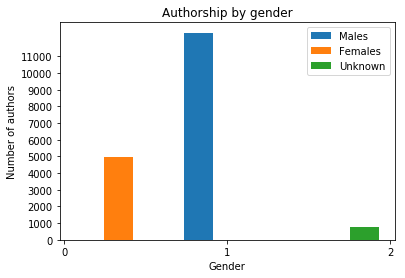

In [31]:
axes = plt.hist([m,f,u],label=["Males","Females","Unknown"], bins=3)
plt.legend()
plt.xticks([0,1,2])
plt.yticks(np.arange(0,12000,1000))
plt.xlabel("Gender")
plt.ylabel("Number of authors")
plt.title("Authorship by gender")
plt.savefig("plots/Authorshipbygender2")
plt.show()
plt.show()

In [32]:
# first_females = 0
# first_males = 0
# first_unknown = 0
# for paper in df["genders"]:
#     if paper[0] == Gender.female:
#         first_females += 1
#     elif paper[0] == Gender.male:
#         first_males += 1
#     else:
#         first_unknown += 1
# p = df["genders"].shape[0]        
# print(first_males, first_females, first_unknown)
# print("Females: {0:.2f} Males: {1:.2f} Unknown: {2:.2f}".format(first_females/p, first_males/p,first_unknown/p))

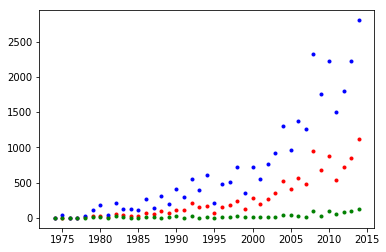

In [14]:
plt.figure()
yrs = []
x = []
y = []
z = []
for i in range(1974,2015):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    yf=0
    ym=0
    yu=0
    for a in auths:
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x.append(yf)
    y.append(ym)
    z.append(yu)
    plt.plot(i,yf,'.r')
    plt.plot(i,ym,'.b')
    plt.plot(i,yu,'.g')
plt.show()

## Papers in which at least pne authors is a given gender

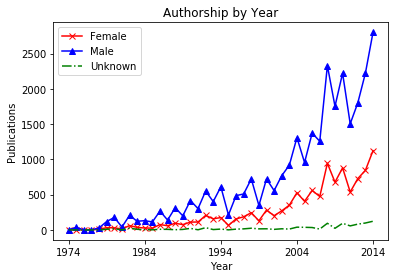

In [33]:
plt.figure()
plt.plot(yrs,x,'-xr',label="Female")
plt.plot(yrs,y,'-^b',label="Male")
plt.plot(yrs,z,'-.g',label="Unknown")
b=np.arange(1974,2015,10)
plt.xticks(b)
plt.legend()
plt.title("Authorship by Year")
plt.ylabel("Publications")
plt.xlabel("Year")
mpl_fig1 = plt.gcf()
plt.savefig("plots/GenderByYear")
plt.show()
#COOauthors
#ratios

In [34]:
py_fig1 = tls.mpl_to_plotly(mpl_fig1, verbose=False)

/home/ramona/anaconda3/envs/mlp/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/home/ramona/anaconda3/envs/mlp/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [35]:
# (1) Plot mpl figure object as a Plotly plot with default style options
py.iplot_mpl(mpl_fig1, strip_style=True, 
             filename='s6_damped_oscillation-default-style')

/home/ramona/anaconda3/envs/mlp/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/home/ramona/anaconda3/envs/mlp/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~RamonaComanescu/0 or inside your plot.ly account where it is named 's6_damped_oscillation-default-style'


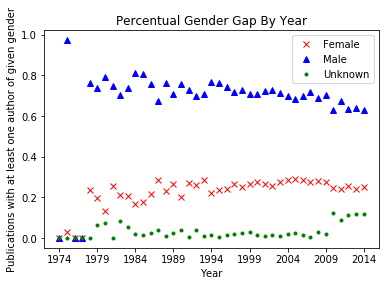

In [19]:
total = np.array(x) + np.array(y) + np.array(z)
perc_f = x/(total+10e-6)
perc_m = y/(total+10e-6)
perc_u = z/(total+10e-6)
plt.figure()
plt.plot(yrs,perc_f,'xr',label="Female")
plt.plot(yrs,perc_m,'^b',label="Male")
plt.plot(yrs,perc_u,'.g',label="Unknown")
b=np.arange(1974,2016,5)
plt.xticks(b)
plt.legend()
plt.title("Percentual Gender Gap By Year")
plt.ylabel("Publications with at least one author of given gender")
plt.xlabel("Year")
plt.savefig("plots/GenderByYear")
plt.show()
#COOauthors
#ratios

In [20]:
newest_papers = df[df["year"]>=2009]
genders = newest_papers["genders"]
authors = newest_papers["authors"]
unkn = []
names = set()
for g in range(genders.shape[0]):
    for i in range(len(authors[g])):
        name = authors[g][i]
        if name in names:
            continue
        if(genders[g][i] == Gender.unknown):
            names.add(name)
            entry = dict()
            entry["name"] = name
            entry["title"] = newest_papers.iloc[g]["title"]
            entry["year"] = newest_papers.iloc[g]["year"]
            entry["venue"] = newest_papers.iloc[g]["venue"]
            unkn.append(entry)
            

In [21]:
unk_df = pd.DataFrame(unkn)
print(len(unk_df))
unk_df.to_csv("recent_unk")
with open("recent_names","w") as f:
    f.write(str.join("\n",names))

1274


In [22]:
all_papers = df
genders = all_papers["genders"]
authors = all_papers["authors"]
all_unkn = []
all_names = set()
for g in range(genders.shape[0]):
    for i in range(len(authors[g])):
        name = authors[g][i]
        if name in all_names:
            continue
        if(genders[g][i] == Gender.unknown):
            all_names.add(name)
            entry = dict()
            entry["name"] = name
            entry["title"] = all_papers.iloc[g]["title"]
            entry["year"] = all_papers.iloc[g]["year"]
            entry["venue"] = all_papers.iloc[g]["venue"]
            all_unkn.append(entry)
all_unk_df = pd.DataFrame(all_unkn)           
print(len(all_unk_df))
all_unk_df.to_csv("all_unk")
with open("all_names","w") as f:
    f.write(str.join("\n",all_names))

1683


In [23]:
df

,authors,genders,title,venue,year
id,,,,,
E03-1001,"[Oard,Douglasw]",[Gender.male],Multilingual Access To Large Spoken Archives (...,EACL,2003
E03-1002,"[Henderson,Jamesb]",[Gender.male],Neural Network Probability Estimation For Broa...,EACL,2003
E03-1003,"[Burstein,Jill, Wolska,Magdalena]","[Gender.female, Gender.female]",Toward Evaluation Of Writing Style: Overly Rep...,EACL,2003
E03-1004,"[Cmejrek,Martin, Curin,Jan, Havelka,Jiri]","[Gender.male, Gender.male, Gender.male]",Czech-English Dependency Tree-Based Machine Tr...,EACL,2003
E03-1005,"[Bod,Rens]",[Gender.male],An Efficient Implementation Of A New DOP Model,EACL,2003
E03-1006,"[Smets,Martine, Gamon,Michael, Corstonoliver,S...","[Gender.female, Gender.male, Gender.male, Gend...",French Amalgam: A Quick Adaptation Of A Senten...,EACL,2003
E03-1007,"[Ueffing,Nicola, Ney,Hermann]","[Gender.female, Gender.male]",Using POS Information For SMT Into Morphologic...,EACL,2003
E03-1008,"[Steedman,Mark, Osborne,Miles, Sarkar,Anoop, C...","[Gender.male, Gender.male, Gender.male, Gender...",Bootstrapping Statistical Parsers From Small D...,EACL,2003
E03-1009,"[Clark,Alexander]",[Gender.male],Combining Distributional And Morphological Inf...,EACL,2003
